# CelebA - Choosing subset

In the following, we choose a subset of the original CelebA dataset in order to decrease training time.

In choosing the subset, we take into account the ultimate goal of our project, to mitigate the effects of working with fewer data.

More specifically, using AttGAN, we decided to develop a "filter" capable of adding mustaches on a face, thus, we focus on choosing a subset that helps in doing so.


## Setting up the environment


### Importing modules


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


### Loading the dataset (annotations only)


In [2]:
data = pd.read_csv("data/list_attr_celeba.csv")
data.head() # display the first n=5 rows


,Image_Name,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


## Choosing the subset

Because of the way AttGAN works (transferring knowledge from the reconstruction task to the generation task), we deemed appropriate to retain **all** the images labeled as having mustaches.

So we start from selecting those images and putting them aside.


In [3]:
mustaches_df = data[data['Mustache'] == 1]
mustaches_paths = mustaches_df[['Image_Name']]
mustaches_count = len(mustaches_paths)
mustaches_paths.head() # display the first n=5 rows


,Image_Name
108,000109.jpg
208,000209.jpg
244,000245.jpg
249,000250.jpg
283,000284.jpg


Then, we (temporarily) remove those images from the dataset, and we subsample the dataset to match the desired number of images.

Here, we chose a 1-to-5 mustache/no_mustache ratio.

The reason we retain so many images without mustaches is to favour generalization, such that the resulting filter will be able to work well with never-seen-before users.


In [4]:
no_mustaches_df = data[data['Mustache'] == 0]
no_mustaches_paths = no_mustaches_df[['Image_Name']]
no_mustaches_count = mustaches_count*5
no_mustaches_subset = no_mustaches_paths.sample(no_mustaches_count, random_state=1) # random_state is set for reproducibility
no_mustaches_subset.head() # display the first n=5 rows



,Image_Name
194810,194811.jpg
99654,099655.jpg
49695,049696.jpg
158622,158623.jpg
151547,151548.jpg


In [5]:
print("The final number of image is", (mustaches_count+no_mustaches_count), "of which")
print(mustaches_count, "are with mustaches and")
print(no_mustaches_count, "are without mustaches")

The final number of image is 50502 of which
8417 are with mustaches and
42085 are without mustaches


Just to make sure, we finally compare the percentage distribution of annotations before and after subsampling (excluding the Mustache attribute).


### Before subsampling


,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,173772,140795,91830,156251,190301,163771,147968,152201,148825,164214,...,186348,99212,153285,130545,156240,185459,98473,169540,181142,41640
1,20410,53387,102352,37931,3881,30411,46214,41981,45357,29968,...,7834,94970,40897,63637,37942,8723,95709,24642,13040,152542


<AxesSubplot:>

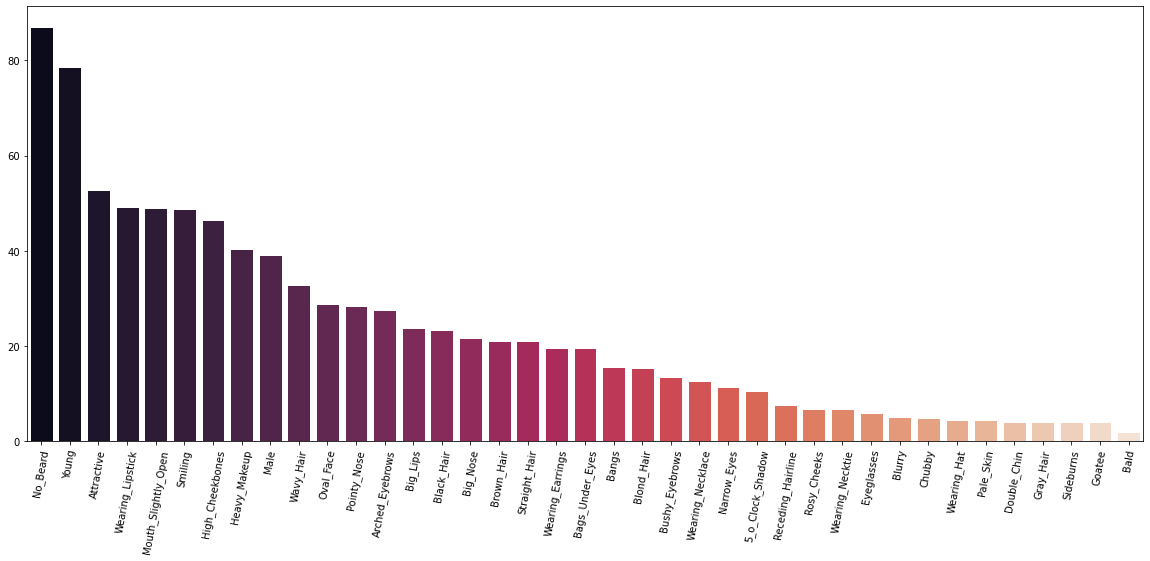

In [6]:
no_mustaches_df = no_mustaches_paths.join(data.set_index('Image_Name'), on='Image_Name')
no_mustaches_df = no_mustaches_df.drop(['Image_Name','Mustache'], axis=1)
counts = no_mustaches_df.apply(pd.value_counts)
display(counts)
labeled_as_1 = counts.iloc[lambda x: x.index == 1]  # take only the row labeled as 1
descending_counts_pairs = sorted(
    zip(labeled_as_1.values.flatten(), labeled_as_1.columns), reverse=True
)   # sort annotations by descending frequency
x = [x for _, x in descending_counts_pairs] # unzip annotations
y = [y for y, _ in descending_counts_pairs] # unzip counts
y_percentage = [(count / len(no_mustaches_df)) * 100 for count in y]
plt.figure(figsize=(20, 8))
plt.xticks(rotation=80)
sns.set_style("whitegrid")
sns.barplot(x=x, y=y_percentage, palette="rocket")



### After subsampling


,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,37700,30531,19968,33901,41246,35518,32052,33092,32179,35606,...,40413,21552,33253,28265,33846,40210,21237,36717,39223,9023
1,4385,11554,22117,8184,839,6567,10033,8993,9906,6479,...,1672,20533,8832,13820,8239,1875,20848,5368,2862,33062


<AxesSubplot:>

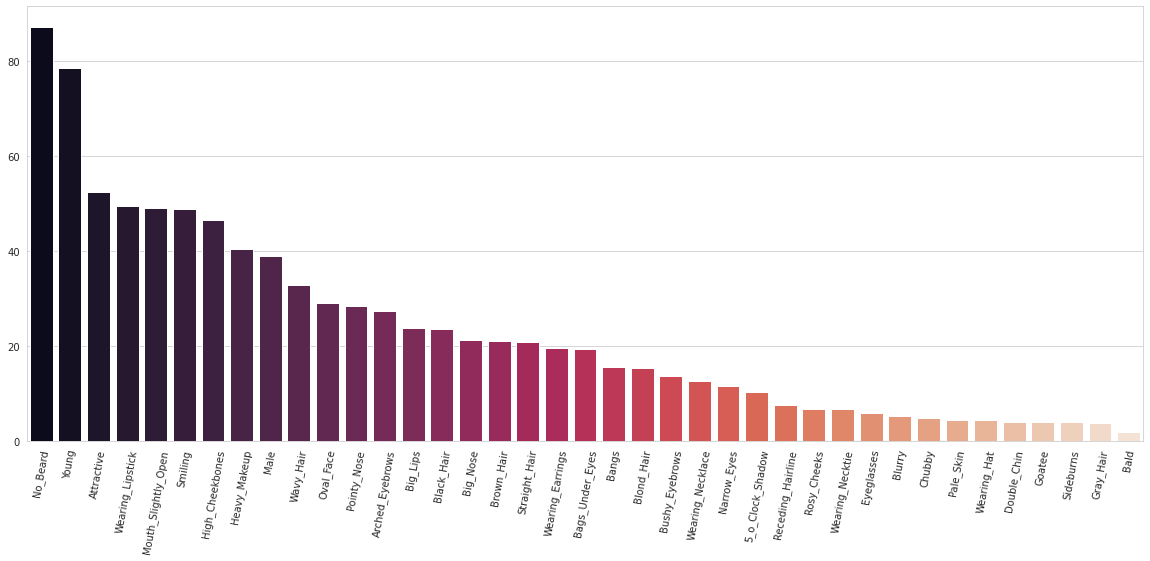

In [7]:
no_mustaches_subset_df = no_mustaches_subset.join(data.set_index('Image_Name'), on='Image_Name')
no_mustaches_subset_df = no_mustaches_subset_df.drop(['Image_Name','Mustache'], axis=1)
counts = no_mustaches_subset_df.apply(pd.value_counts)
display(counts)
labeled_as_1 = counts.iloc[lambda x: x.index == 1]  # take only the row labeled as 1
descending_counts_pairs = sorted(
    zip(labeled_as_1.values.flatten(), labeled_as_1.columns), reverse=True
)   # sort annotations by descending frequency
x = [x for _, x in descending_counts_pairs] # unzip annotations
y = [y for y, _ in descending_counts_pairs] # unzip counts
y_percentage = [(count / len(no_mustaches_subset_df)) * 100 for count in y]
plt.figure(figsize=(20, 8))
plt.xticks(rotation=80)
sns.set_style("whitegrid")
sns.barplot(x=x, y=y_percentage, palette="rocket")

The plots look the same, but the number of occurrences (as shown by `display(counts)`) are different, which is exactly what we wanted.


## Putting everything together

We now glue back the images with mustaches and the subset of images without mustaches, and store their indices (nb: images' names are 1-indexed, but we need indices to be 0-indexed).


In [8]:
def index_from_filename(filename: str):
    without_jpg = filename[:-4]
    return int(without_jpg) - 1

chosen_images = pd.concat([mustaches_paths, no_mustaches_subset])
filenames = chosen_images["Image_Name"].to_list()
np_indices = np.asarray(list(map(index_from_filename, filenames)))
np.save(f"data/chosen_indices", np_indices)